## Integrantes
- Juan Pablo Ocampo Santana
- Oscar Andres Tepud Jacome
- Juan Esteban Mora Diaz

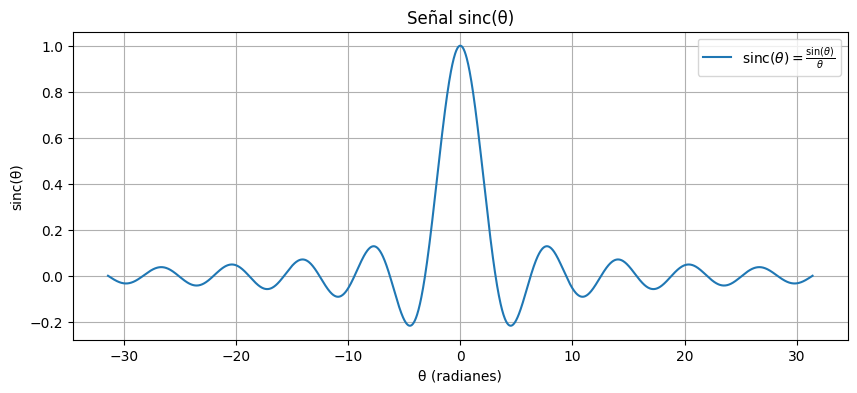

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de theta (en radianes)
theta = np.linspace(-10*np.pi, 10*np.pi, 2000)

# Definición de sinc(θ) = sin(θ)/θ con manejo en θ=0
sinc_theta = np.where(theta == 0, 1, np.sin(theta)/theta)

# Graficar la señal sinc
plt.figure(figsize=(10,4))
plt.plot(theta, sinc_theta, label=r'$\mathrm{sinc}(\theta) = \frac{\sin(\theta)}{\theta}$')
plt.title("Señal sinc(θ)")
plt.xlabel("θ (radianes)")
plt.ylabel("sinc(θ)")
plt.grid(True)
plt.legend()
plt.show()


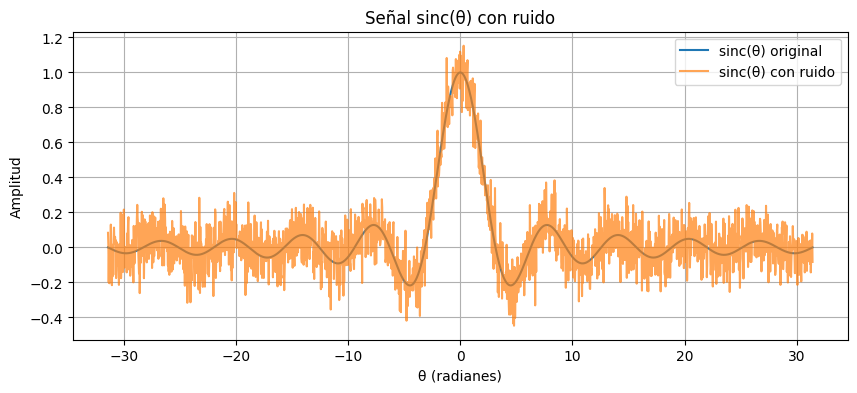

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de theta
theta = np.linspace(-10*np.pi, 10*np.pi, 2000)

# Señal sinc(θ) = sin(θ)/θ
sinc_theta = np.where(theta == 0, 1, np.sin(theta)/theta)

# Generar ruido gaussiano (media=0, desviación estándar=0.1)
ruido = np.random.normal(0, 0.1, size=theta.shape)

# Señal sinc con ruido
sinc_ruido = sinc_theta + ruido

# Graficar
plt.figure(figsize=(10,4))
plt.plot(theta, sinc_theta, label="sinc(θ) original")
plt.plot(theta, sinc_ruido, label="sinc(θ) con ruido", alpha=0.7)
plt.title("Señal sinc(θ) con ruido")
plt.xlabel("θ (radianes)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# -------------------
# Definir señal sinc
# -------------------
theta = np.linspace(-10*np.pi, 10*np.pi, 2000)
sinc_theta = np.where(theta==0, 1, np.sin(theta)/theta)

# Ruido gaussiano
ruido = np.random.normal(0, 0.1, size=theta.shape)
sinc_ruido = sinc_theta + ruido

# -------------------
# Configuración figura
# -------------------
fig, ax = plt.subplots(figsize=(8,4))
line_clean, = ax.plot([], [], 'b-', label="sinc(θ) ideal")
line_noisy, = ax.plot([], [], 'r.', alpha=0.6, label="sinc(θ) con ruido")

ax.set_xlim(theta.min(), theta.max())
ax.set_ylim(-0.5, 1.2)
ax.set_title("Animación de sinc(θ) con ruido")
ax.set_xlabel("θ (radianes)")
ax.set_ylabel("Amplitud")
ax.grid(True)
ax.legend()

# -------------------
# Funciones de animación
# -------------------
def init():
    line_clean.set_data([], [])
    line_noisy.set_data([], [])
    return line_clean, line_noisy

def update(i):
    # Mostrar sinc completa en azul
    line_clean.set_data(theta, sinc_theta)
    # Mostrar i puntos con ruido
    line_noisy.set_data(theta[:i], sinc_ruido[:i])
    return line_clean, line_noisy

# -------------------
# Crear animación
# -------------------
frames = np.linspace(10, len(theta), 60, dtype=int)  # 60 frames
anim = animation.FuncAnimation(fig, update, frames=frames, init_func=init,
                               blit=True, interval=100)

rc('animation', html='jshtml')
HTML(anim.to_jshtml())


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from ipywidgets import interact, IntSlider

# --------------------------
# Datos: sinc con ruido
# --------------------------
theta = np.linspace(-10*np.pi, 10*np.pi, 500).reshape(-1, 1)
sinc_theta = np.where(theta == 0, 1, np.sin(theta)/theta)
ruido = np.random.normal(0, 0.1, size=theta.shape)
y = sinc_theta + ruido

# --------------------------
# Configuración de CV (70/30)
# --------------------------
cv = ShuffleSplit(n_splits=10, test_size=0.3, train_size=0.7, random_state=0)

# --------------------------
# Función interactiva
# --------------------------
def plot_sinc_poly(grado):
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=grado)),
        ("lin", LinearRegression())
    ])

    # Validación cruzada
    scores = cross_val_score(model, theta, y, cv=cv, scoring='r2')
    r2_promedio = scores.mean()

    # Hacemos un split (solo para graficar train vs test)
    X_train, X_test, y_train, y_test = train_test_split(theta, y, test_size=0.3, random_state=42)

    # Entrenamos con train
    model.fit(X_train, y_train)
    y_pred = model.predict(theta)

    # Graficar
    plt.figure(figsize=(10,5))
    plt.scatter(X_train, y_train, s=15, alpha=0.6, c="blue", label="Train")
    plt.scatter(X_test, y_test, s=15, alpha=0.6, c="orange", label="Test")
    plt.plot(theta, sinc_theta, 'g', label="sinc original")
    plt.plot(theta, y_pred, 'r', label=f"Polinomio grado {grado}")
    plt.ylim(-1.5, 1.5)
    plt.title(f"Ajuste polinómico grado {grado} | R² promedio CV = {r2_promedio:.4f}")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Resultados R² promedio (70/30 cross-validation) para grado {grado}: {r2_promedio:.4f}")

# --------------------------
# Slider interactivo
# --------------------------
interact(plot_sinc_poly, grado=IntSlider(min=1, max=30, step=1, value=5))


interactive(children=(IntSlider(value=5, description='grado', max=30, min=1), Output()), _dom_classes=('widget…

<function __main__.plot_sinc_poly(grado)>

/tmp/ipython-input-2304557013.py:35: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  return np.random.multivariate_normal(mu, Sigma, n_samples)
/tmp/ipython-input-2304557013.py:35: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  return np.random.multivariate_normal(mu, Sigma, n_samples)
/tmp/ipython-input-2304557013.py:55: RuntimeWarning: invalid value encountered in sqrt
  return mean, np.sqrt(var)
/tmp/ipython-input-2304557013.py:35: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  return np.random.multivariate_normal(mu, Sigma, n_samples)
/tmp/ipython-input-2304557013.py:55: RuntimeWarning: invalid value encountered in sqrt
  return mean, np.sqrt(var)
/tmp/ipython-input-2304557013.py:35: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  return np.random.multivariate_normal(mu, Sigma, n_samples)
/tmp/ipython-input-2304557013.py:55: RuntimeWarning: invalid value encountered in sqrt
  return mean, np.sqrt(

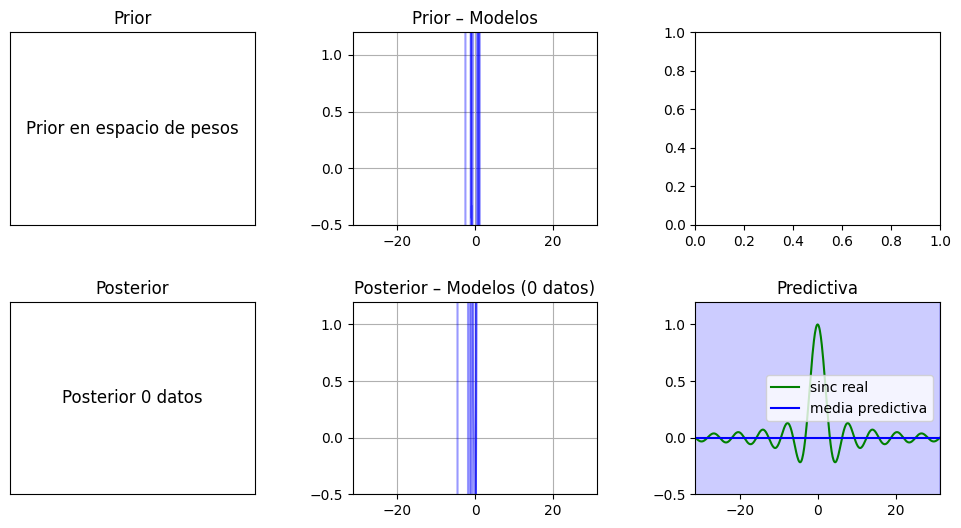

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from numpy.linalg import inv
from sklearn.preprocessing import PolynomialFeatures

# --------------------------
# Datos: sinc con ruido
# --------------------------
np.random.seed(42)
theta = np.linspace(-10*np.pi, 10*np.pi, 500).reshape(-1,1)   # rango extendido
sinc_theta = np.sinc(theta/np.pi)
ruido = np.random.normal(0, 0.05, size=theta.shape)
t = sinc_theta + ruido

# --------------------------
# Polinomio con grado Q
# --------------------------
Q = 15   # prueba: cambia el grado aquí
poly = PolynomialFeatures(degree=Q, include_bias=True)
X = poly.fit_transform(theta)

# Prior (Gaussiano)
alpha = 0.005
beta = 1/0.05**2

mu_w = np.zeros(X.shape[1])
S_w = (1/alpha)*np.eye(X.shape[1])

# --------------------------
# Funciones auxiliares
# --------------------------
def sample_weights(mu, Sigma, n_samples=5):
    return np.random.multivariate_normal(mu, Sigma, n_samples)

def plot_functions(ax, W):
    xx = np.linspace(-10*np.pi, 10*np.pi, 500).reshape(-1,1)
    XX = poly.transform(xx)
    for w in W:
        yy = XX @ w
        ax.plot(xx, yy, 'b', alpha=0.4)
    ax.set_xlim(-10*np.pi, 10*np.pi)
    ax.set_ylim(-0.5,1.2)
    ax.grid(True)

def posterior(X, t, alpha, beta):
    SN = inv(alpha*np.eye(X.shape[1]) + beta * X.T @ X)
    mN = beta * SN @ X.T @ t
    return mN.ravel(), SN

def predict(Xnew, mN, SN, beta):
    mean = Xnew @ mN
    var = 1/beta + np.sum(Xnew @ SN * Xnew, axis=1)
    return mean, np.sqrt(var)

# --------------------------
# Figura
# --------------------------
fig, ax = plt.subplots(2, 3, figsize=(12,6))
ax[0,2].axis('off')  # cuadro vacío

xx = np.linspace(-10*np.pi, 10*np.pi, 500).reshape(-1,1)
XX = poly.transform(xx)
true_y = np.sinc(xx/np.pi)

# --------------------------
# Animación
# --------------------------
def update(i):
    for a in ax.flat:
        a.clear()

    # Prior – Modelos
    W_prior = sample_weights(mu_w, S_w, n_samples=5)
    plot_functions(ax[0,1], W_prior)
    ax[0,1].set_title("Prior – Modelos")

    # Posterior
    if i > 0:
        mN, SN = posterior(X[:i], t[:i], alpha, beta)
    else:
        mN, SN = mu_w, S_w

    # Posterior – Modelos
    W_post = sample_weights(mN, SN, n_samples=5)
    plot_functions(ax[1,1], W_post)
    ax[1,1].scatter(theta[:i], t[:i], c='r', marker='.')
    ax[1,1].set_title(f"Posterior – Modelos ({i} datos)")

    # Predictiva
    mean, std = predict(XX, mN, SN, beta)
    ax[1,2].plot(xx, true_y, 'g', label="sinc real")
    ax[1,2].plot(xx, mean, 'b', label="media predictiva")
    ax[1,2].fill_between(xx.ravel(), mean-2*std, mean+2*std, color='blue', alpha=0.2)
    ax[1,2].scatter(theta[:i], t[:i], c='r', marker='.')
    ax[1,2].set_ylim(-0.5,1.2)
    ax[1,2].set_xlim(-10*np.pi, 10*np.pi)
    ax[1,2].set_title("Predictiva")
    ax[1,2].legend()

    # Prior (texto)
    ax[0,0].text(0.5,0.5,"Prior en espacio de pesos",ha='center',va='center',fontsize=12)
    ax[0,0].set_xticks([]); ax[0,0].set_yticks([])
    ax[0,0].set_title("Prior")

    # Posterior (texto)
    ax[1,0].text(0.5,0.5,f"Posterior {i} datos",ha='center',va='center',fontsize=12)
    ax[1,0].set_xticks([]); ax[1,0].set_yticks([])
    ax[1,0].set_title("Posterior")

    plt.subplots_adjust(wspace=0.4, hspace=0.4)

# frames hasta 500 datos
frames = [0,1,2,5,10,20,50,100,200,300,400,500]

anim = animation.FuncAnimation(fig, update, frames=frames, blit=False)
rc('animation', html='jshtml')
HTML(anim.to_jshtml())
